In [1]:
import tensorflow as tf
import _pickle as Pickle
import gzip
import numpy as np
import matplotlib.pyplot as plot
import imageio

In [2]:
class dense_layer:
    def __init__(self,n_inputs,n_outputs,ativ_funcao):
        self.n_inputs,self.n_outputs,self.ativ_funcao=n_inputs,n_outputs,ativ_funcao
        self.W=tf.Variable(tf.random.normal([n_inputs,n_outputs],0,1/n_inputs**0.5),trainable=True)
        self.b=tf.Variable(tf.zeros([1,n_outputs]),trainable=True)
        
        self.params=[self.W,self.b]
    def execute(self,inputs):
        return self.ativ_funcao(tf.matmul(inputs,self.W)+self.b)

In [3]:
param=[]
layers=[]
layers.append(dense_layer(28*28,50,tf.nn.relu))
param=param+layers[-1].params
layers.append(dense_layer(50,10,tf.nn.sigmoid))
param=param+layers[-1].params

In [4]:
def classificar(x):
    value=x
    for layer in layers:
        value=layer.execute(value)
    return value

In [5]:
classificar(tf.random.normal([1,28*28]))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.6731846 , 0.47087404, 0.5365682 , 0.6473296 , 0.3113552 ,
        0.43254995, 0.75598985, 0.57658195, 0.46871817, 0.52276886]],
      dtype=float32)>

In [6]:
def erros(x,y):
    y_pred=classificar(x)
    return tf.math.reduce_mean((y_pred-y)**2)

In [7]:
def acuracia(x,y):
    y_pred=classificar(x)
    acertos=tf.cast(tf.equal(tf.math.argmax(y_pred,axis=1),tf.math.argmax(y,axis=1)),'float32')
    return tf.math.reduce_mean(acertos)

### Importando dados para treino

In [8]:
# O banco de dados pode ser encontrado em http://yann.lecun.com/exdb/mnist/
f = gzip.open("mnist.pkl.gz", 'rb')
training_data, validation_data, test_data = Pickle.load(f,encoding='latin1')
f.close()
train_x=tf.constant(training_data[0])
train_y=tf.one_hot(training_data[1],10)
val_x=tf.constant(validation_data[0])
val_y=tf.one_hot(validation_data[1],10)

In [9]:
def step(x,y,learnrate):
    with tf.GradientTape() as watch_grad:
        custo=erros(x,y)
    grads=watch_grad.gradient(custo,param)
    for par,grad in zip(param,grads):
        par.assign(par-learnrate*grad)
    return custo

In [10]:
def epoch(n):
    for j in range(n):
        for i in range(100):
            x=train_x[i*500:(i+1)*500]
            y=train_y[i*500:(i+1)*500]
            custo=step(x,y,10**-1)
        print('Custo: ',erros(val_x,val_y).numpy(),' Acurácia: ',acuracia(val_x,val_y).numpy(),end='\r')

In [11]:
epoch(1000)

In [12]:
def compara(nome,ext='bmp'):
    image= imageio.imread(nome+'.'+ext,pilmode='L')
    plot.imshow(image,cmap='Greys')
    output=classificar(image.reshape(1,784).astype('float32'))
    print(np.argmax(output))

2


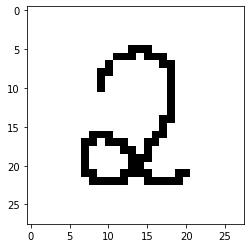

In [13]:
compara('number')